In [6]:
from tensorflow import keras

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [9]:
train_scaled = (train_input / 255).reshape(-1, 28 * 28)

# test_size = 0.2 -> 훈련 셋 8 : 검증 셋 2로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

## 2개의 층   
은닉층 : 입력층과 출력층 사이에 있는 모든 층

In [10]:
# 일반적으로 출력층의 뉴런보다 은닉층의 뉴런이 많아야한다.
hidden1= keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,)) # z값이 아무리 커져도 1에 수렴하고 아무리 작아져도 0에 수렴
output = keras.layers.Dense(10, activation = "softmax") # 출력값을 0~1로 압축하고 전체 합을 1로 조정

은닉층에서 계산 결과에 의미를 주기 위해서 선형 계산을 비선형적으로 비틀어 주어야함 (sigmoid, ReLU)

In [11]:
model = keras.Sequential([hidden1, output])

In [12]:
model.summary()
# dense_2 Param =  특성 784 * 뉴런 개수 + 편향치 개수
# dense_3 Param =  특성 100 * 뉴런 개수 + 편향치 개수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


층을 추가하는 다른 방법

In [13]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,), name = "hidden"),
    keras.layers.Dense(10, activation = "softmax", name = "output")
], name = "SJS_Model")
model.summary()

Model: "SJS_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model = keras.Sequential(name = "SJS_Model")
model.add(keras.layers.Dense(100, activation = "sigmoid", input_shape = (784,), name = "hidden1"))
model.add(keras.layers.Dense(10, activation = "softmax", name = "output"))
model.summary()

Model: "SJS_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 훈련

In [15]:
model.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(train_scaled, train_target, epochs = 7)

Epoch 1/7
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5712 - accuracy: 0.8053
Epoch 2/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8513
Epoch 3/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3780 - accuracy: 0.8645
Epoch 4/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3546 - accuracy: 0.8722
Epoch 5/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3383 - accuracy: 0.8775
Epoch 6/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3236 - accuracy: 0.8825
Epoch 7/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8873


# ReLU 함수와 Flatten 층   
* 시그모이드 함수는 DNN에서 학습이 어려운 구조임
* ReLU함수는 입력이 음수면 0 양수면 통과시킴
*
* Flatten 층은 reshape() 메서드 대신 사용함 (입력 차원을 모두 일렬로 펼치는 역할)

In [19]:
model = keras.Sequential(name = "use_ReLU_FlattenLayer")
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.summary()

Model: "use_ReLU_FlattenLayer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


데이터 준비

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

print(train_scaled.shape, train_target.shape, val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,)


In [22]:
model.compile(loss = "sparse_categorical_crossentropy", metrics="accuracy")
model.fit(train_scaled, train_target, epochs = 7)

Epoch 1/7
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5259 - accuracy: 0.8142
Epoch 2/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3927 - accuracy: 0.8593
Epoch 3/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3535 - accuracy: 0.8716
Epoch 4/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3322 - accuracy: 0.8804
Epoch 5/7
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3166 - accuracy: 0.8868
Epoch 6/7
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8904
Epoch 7/7
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8944


In [24]:
# 검증
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8857


[0.33847126364707947, 0.8857499957084656]

# 하이퍼 파라미터
* 모델이 학습하지 않아 사람이 직접 지정해 줘야 하는 파라미터
* 은닉층, 뉴런 개수
* activation function
* layer 개수
* fit 메서드의 batch_size, epochs 매개변수
* 옵티마이저

## 옵티마이저
* compile 메서드에서 지정하는 경사 하강법 알고리즘 종류
* 케라스 경사 하강법 알고리즘 : RMSprop
* 기본 경사 하강법 옵티마이저 : SGD, 모멘텀, 네스테로프 모멘텀
* 적응적 학습률 옵티마이저 : RMSprop, Adagrad
* 모멘텀 최적화와 RMSprop의 장점 접목 : Adam
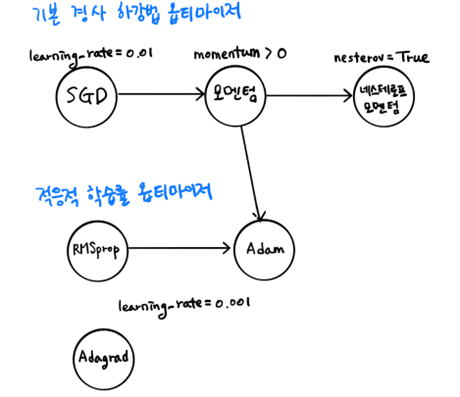